# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df.loc[:, 'Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [5]:
clean_hospital_read_df.tail(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


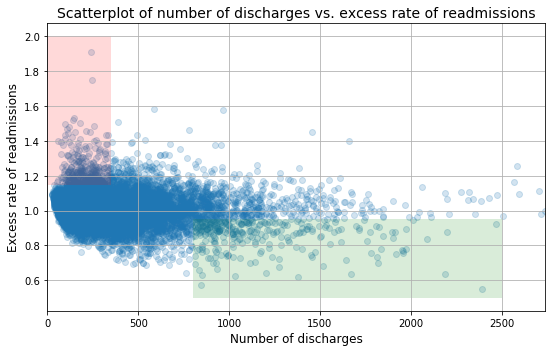

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A.  Do you agree with the above analysis and recommendations?

In [7]:
## Extract working data frame
df = clean_hospital_read_df[~clean_hospital_read_df.isnull()['Excess Readmission Ratio']].reset_index(drop=True).iloc[:-3]
df = df[['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate']]

In [8]:
df.isnull().sum()

Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
dtype: int64

In [9]:
print("Correlation between 'Number of Discharges' and 'Excess Readmission Rate': {:4f}".format(df.corr().iloc[0, 1]))

Correlation between 'Number of Discharges' and 'Excess Readmission Rate': -0.093096


In [10]:
print("Number of hospitals with number of discharges less than 100 is:",  df[df['Number of Discharges'] < 100].shape[0])
print("Number of hospitals with number of discharges greater than 1000 is:",  df[df['Number of Discharges'] > 1000].shape[0])
print("Total sample size is:", df[df['Number of Discharges'] < 100].shape[0] + df[df['Number of Discharges'] > 1000].shape[0])

Number of hospitals with number of discharges less than 100 is: 1188
Number of hospitals with number of discharges greater than 1000 is: 460
Total sample size is: 1648


I disagree with the above analysis because the report jumps to conclusions from cursory observation without providing any analytics. For example, it did not even mention how it is in decreasing trend. Excess rate of readmission is in __very weak negative correlation__ with the number of discharges, which means, yes, it is overall __trending down__ with increasing number of discharges, BUT __very mildly__. Furthremore, without statistical test, the report hastly concluded the case, which must not be acceptable considering its recommendation can lead hospitals/facilities to enormous spending. Last but not least, even though the report clearly mentions values 100 and 1000 of number of discharges, the __graph does not reflect those values; it is distorting__. This problem requires sound stastical test.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis

Before I begin, I will set null hypothesis ($Ho$) and alternative hypothesis ($Ha$). 
* $Ho$: There is NO significant difference in mean excess readmission ratio when the number of discharges is less than 100 and when is larger than 1000
* $Ha$: There is significant difference in mean excess readmission ratio when the number of discharges is less than 100 and when is larger than 1000

Simply put mathematically:
* $Ho$: $\mu_{100}$ = $\mu_{1000}$
* $Ha$: $\mu_{100}$ $\neq$ $\mu_{1000}$

Sample size is 1648 and is much greater than 30 which is commonly accepted as threshold number for CLT. Therefore, we can apply CLT. As to the assessment of the problem, this is where siginificance tests can play a role. Because by definition, significance tests tell us whether an observed effect, such as difference between two means or a correlation between two variables, could reasonably __occur "just by chance"__ in selecting a random sample. If not, we have evidence that the effect observed in the sample reflects an effect that is present in the population. We can consider three options: two-sample z-test, permutation tests or chi-squared. __I will use permutation tests__. Once we assume our case is by chance, we can also presume number of discharges and excess readmission rate are independent and thus all observations are exchangeable; thus letting us perform permutation test. 

### Permutation test

In [11]:
## helpfer function
def draw_perm_reps(obs1, obs2, size=1):
    """Draw permutation replicates by given function
    Input: 1) obs1: observations of 1d array or list of first group ('small')
           2) obs2: observations of 1d array or list of second group ('large')
           3) size: size of return array of replicates
    Output: 1d array of repllicates
    """
    ## helpfer function that generates replicate of a sample
    def permutation_sample(obs1, obs2):
        """Generate a permutation sample from two data sets.
        Input: two arrays of differnt groups ('small', 'large')
        output: permuted data arrays
        """
        ## concatenate the data sets: data
        data = np.concatenate([obs1, obs2])
        ## permute the concatenated array: permuted_data
        permuted_data = np.random.permutation(data)
        # Split the permuted array into two: perm_sample_1, perm_sample_2
        perm_sample_1 = permuted_data[:len(obs1)]
        perm_sample_2 = permuted_data[len(obs2):]

        return perm_sample_1, perm_sample_2
    
    ## initialize array of replicates of size
    perm_replicates = np.empty(size)
    
    ## generate replicates
    for i in range(size):
        ## permuted sample
        perm_small, perm_large = permutation_sample(obs1, obs2)
        ## difference of proportion between two groups
        perm_replicates[i] = perm_small[perm_small>1].shape[0]/len(perm_small) \
                             - perm_large[perm_large>1].shape[0]/len(perm_large)
    
    return perm_replicates

Observed ratio difference: 0.186503
p-value: 0.0
The null hypothesis can be rejected: 
	There is LIKELY significant difference in mean excess readmission ratio 
	when the number of discharges is less than 100 and when is larger than 1000
99% confidence interval of permutation distribution is [-0.024, 0.024]
Margin of error at 99% confidence is: 0.024


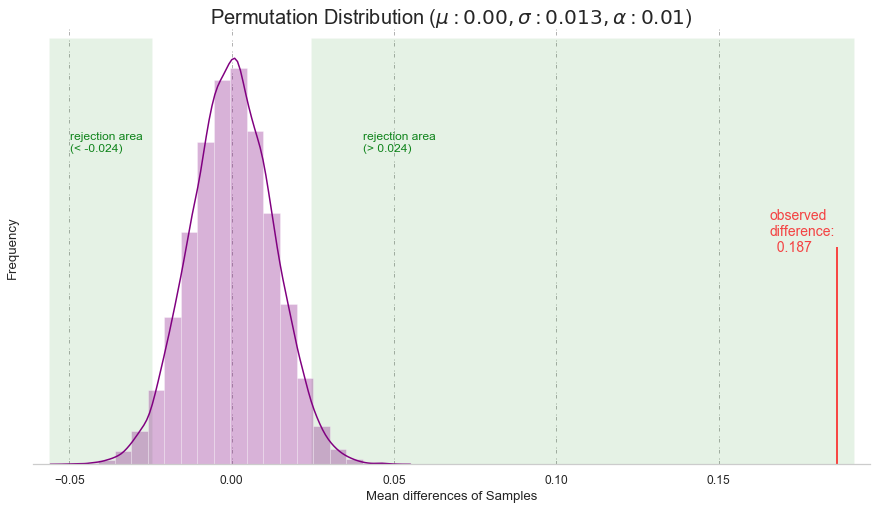

In [12]:
## split data into sub-samples based on whether number of discharges is greater than 1000 or less than 100
df_small = df[df['Number of Discharges'] < 100]
df_large = df[df['Number of Discharges'] > 1000]

## arrays of readmission ratio
adf_small = df_small['Excess Readmission Ratio'].values
adf_large = df_large['Excess Readmission Ratio'].values

## observed ratio difference 
observed = adf_small[adf_small>1].shape[0] / len(adf_small) - adf_large[adf_large>1].shape[0] / len(adf_large)

## permute the sample of 50,000 times and calculate the difference of proportion of call
perm_replicates = draw_perm_reps(adf_small, adf_large, size=50000)

## define significance level: 0.05
alpha = 0.01
## calculate the p_value
p_value = np.sum(perm_replicates > observed) / len(perm_replicates)

## null hypothesis: 
## There is NO significant difference in mean excess readmission ratio when the number of discharges is less than 100 and when is larger than 1000
print("Observed ratio difference: {:.6f}".format(observed))
print("p-value:", p_value)
if p_value < alpha:
    print("The null hypothesis can be rejected: \n\tThere is LIKELY significant difference in mean excess readmission ratio \n\twhen the number of discharges is less than 100 and when is larger than 1000")
else:
    print("the null hypothesis cannot be rejected: \n\tThere is NO significant difference in mean excess readmission ratio \n\twhen the number of discharges is less than 100 and when is larger than 1000")

## calculate 95% confidence interval of permutation distribution
left, right = np.percentile(perm_replicates, [2.5, 97.5])
print("99% confidence interval of permutation distribution is [{:.3f}, {:.3f}]".format(left, right))

## calculate margine of error: me
me = (right - left) / 2
print("Margin of error at 99% confidence is: {:.3f}".format(me))

## visualization
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid", font_scale=1.1)

## distribution plot
ax = sns.distplot(perm_replicates, bins=20, color = 'purple', hist_kws=dict(alpha=0.3))

plt.title(r'Permutation Distribution ($\mu: {:.2f}, \sigma: {:.3f}, \alpha: 0.01$)'.format(np.mean(perm_replicates), np.std(perm_replicates)), fontsize=20)
plt.xlabel('Mean differences of Samples')
plt.ylabel('Frequency')
ax.yaxis.set_ticklabels([])

y = ax.get_ylim()[1]
ax.fill_between([min(perm_replicates)-0.005, left], 0, y, facecolor='green', alpha=0.1)
ax.fill_between([right, observed+0.005], 0, y, facecolor='green', alpha=0.1)

ax.text(0.045, 0.72, 'rejection area \n(< {:.3f})'.format(left), 
         transform=ax.transAxes, color='#0f841b', fontsize=12);
ax.text(0.395, 0.72, 'rejection area \n(> {:.3f})'.format(right), 
         transform=ax.transAxes, color='#0f841b', fontsize=12);

ax.vlines(observed, 0,0.5, transform=ax.get_xaxis_transform(), alpha=0.7, color='red', linewidth=2)
ax.text(0.88, 0.49, "observed\ndifference:\n  {:.3f}".format(observed), 
        transform=ax.transAxes, color="#f44242", fontsize=14)

sns.despine(right=True, top=True, left=True)
ax.grid(color="grey", linestyle=(0, (3.5, 1.5, 1, 5)), alpha=0.6)
ax.yaxis.grid(False)
ax.margins(0.02)

According to the permutation test, p-value is very minute which means __we reject the null hypothesis__ and implies there is likely significant difference in mean excess readmission ratio when the number of discharges is less than 100 and when is larger than 1000.

# Critiques on Preliminary Report
First let us discuss the scatter plot from preliminary report. It is easy to visualize the density and correlation of the two variables being plotted. The colors provide easy markers to illustrate where the "good" and "bad" areas are of the plot. However, as I mentioned earlier, even though the report clearly mentions values 100 and 1000 of number of discharges, the graph does not reflect those values; it is distorting. Below is what I think is better visualization.

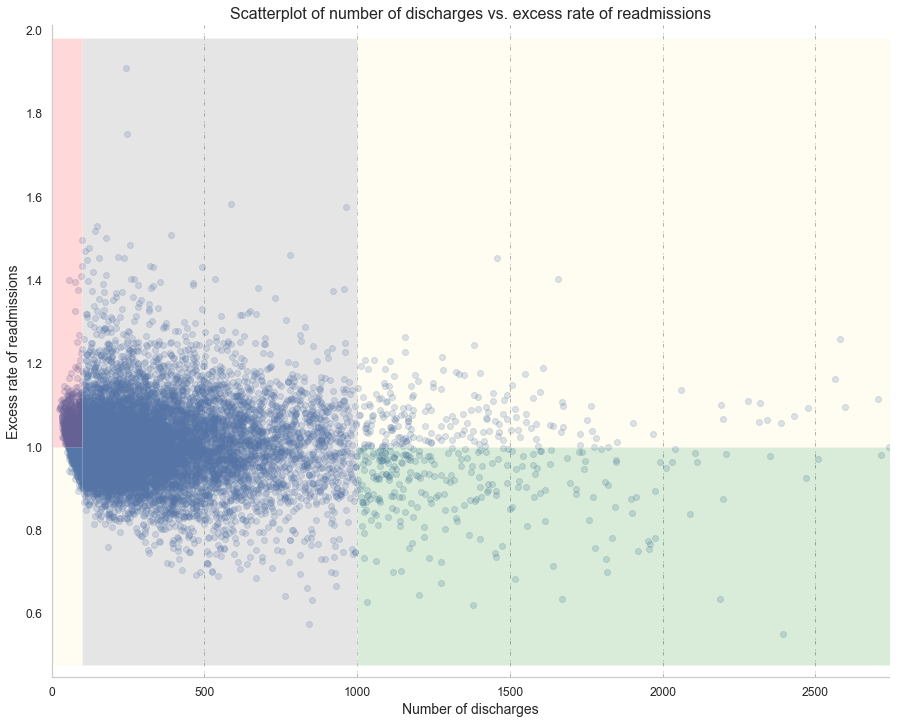

In [13]:
sns.set(style="whitegrid", font_scale=1.1)
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(df['Number of Discharges'], df['Excess Readmission Ratio'], alpha=0.2)

y_bot, y_top = ax.get_ylim()
x_left, x_right = ax.get_xlim()
ax.fill_between([x_left,100], 1, y_top, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([x_left,100], y_bot, 1, facecolor='gold', alpha = .05, interpolate=True)
ax.fill_between([1000,x_right], y_bot, 1, facecolor='green', alpha = .15, interpolate=True)
ax.fill_between([1000,x_right], 1, y_top, facecolor='gold', alpha = .05, interpolate=True)
ax.fill_between([100, 1000], y_bot, y_top, facecolor='grey', alpha = .2, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=14)
ax.set_ylabel('Excess rate of readmissions', fontsize=14)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=16)

sns.despine(top=True, right=True)
ax.grid(color="grey", linestyle=(0, (3.5, 1.5, 1, 5)), alpha=0.6)
ax.yaxis.grid(False)
ax.margins(0.02)

In [14]:
## extract grey area data samples
grey = df[(df['Number of Discharges'] >= 100) & (df['Number of Discharges'] <= 1000)]
print("discarded sample size: {} ({:.1f}%)".format(grey.shape[0], (grey.shape[0]/df.shape[0] * 100)) )

discarded sample size: 9846 (85.7%)


As we can see in the above scatter plot, using bounds of 100 and 1000, we did not use grey area points at all which takes up 85.7% of entire data. This is such a waste of data. It is never a good practice to ignore more than 80% of it in your analysis.

In [15]:
red_prop = adf_small[adf_small>1].shape[0] / len(adf_small)
grey_prop = grey[grey['Excess Readmission Ratio']>1].shape[0] / len(grey) 
green_prop = adf_large[adf_large>1].shape[0] / len(adf_large)

print("Excess ratio of readmission when # of Discharges < 100: {:.1f}%".format(red_prop * 100))
print("Average excess ratio of readmission when # of Discharges < 100: {:.4f}".format(np.mean(adf_small)))
print()
print("Excess ratio of readmission when # of Discharges >= 100 & <= 1000 : {:.1f}%".format(grey_prop * 100))
print("Average excess ratio of readmission when # of Discharges >= 100 & <= 1000 : {:.4f}".format(np.mean(grey['Excess Readmission Ratio'])))
print()
print("Excess ratio of readmission when # of Discharges > 1000: {:.1f}%".format(green_prop * 100))
print("Average excess ratio of readmission when # of Discharges > 1000: {:.4f}".format(np.mean(adf_large)))

Excess ratio of readmission when # of Discharges < 100: 63.2%
Average excess ratio of readmission when # of Discharges < 100: 1.0226

Excess ratio of readmission when # of Discharges >= 100 & <= 1000 : 50.6%
Average excess ratio of readmission when # of Discharges >= 100 & <= 1000 : 1.0071

Excess ratio of readmission when # of Discharges > 1000: 44.6%
Average excess ratio of readmission when # of Discharges > 1000: 0.9791


Average excess ratios of readmission do show some difference over number of discharges.

Correlation between 'Number of Discharges' and 'Excess Readmission Rate': -0.093096


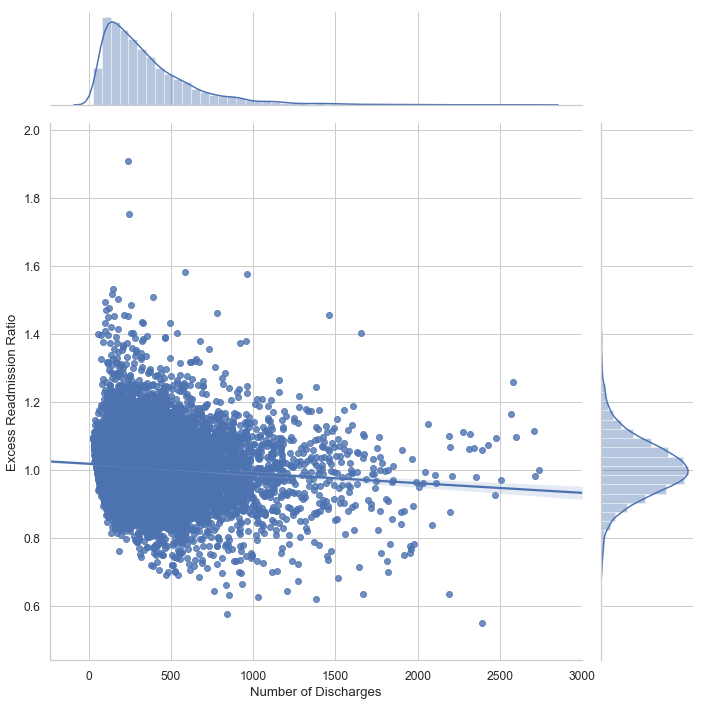

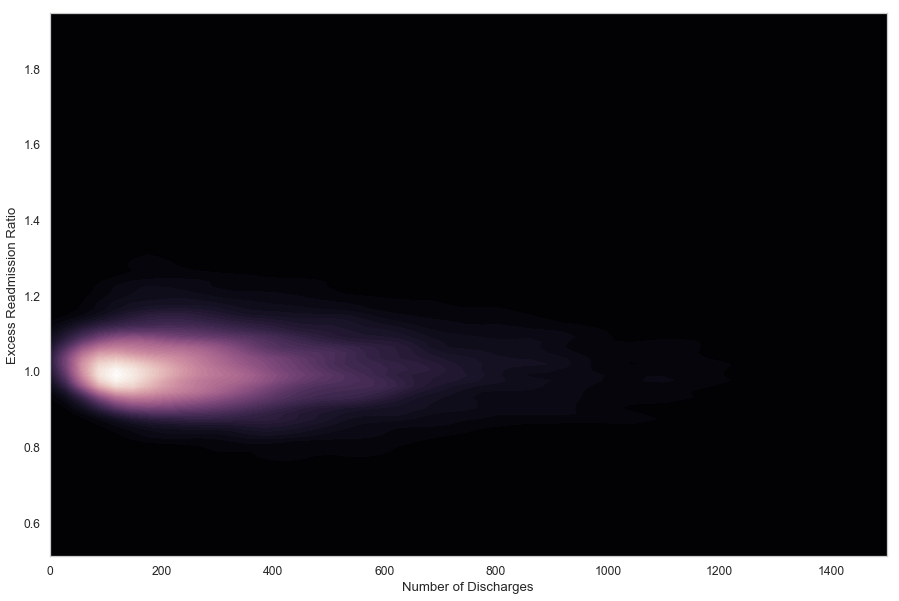

In [16]:
print("Correlation between 'Number of Discharges' and 'Excess Readmission Rate': {:4f}".format(df.corr().iloc[0, 1]))

## visualize scatter plot with correlation line
ax1 = sns.jointplot(df.iloc[:,0], df.iloc[:,1], height=10, kind='reg')
plt.show()

## density plot
plt.figure(figsize=(15, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
ax2 = sns.kdeplot(df.iloc[:,0], df.iloc[:, 1], cmap=cmap, n_levels=60, shade=True)
ax2.set_xlim([0, 1500])
plt.show()

Looking at the scatter plot above with the plotted correlation line, we can see that there is practically no correlation in the bivariate distribution, qualitatively with a pearson coeffecient of __-0.093__. When looking at the density plot above as well, we can see that the density seems to distribute itself in a horizontal orientation as well, confirming the notion that there is no correlation between Readmission Rates and Discharges Rates

All in all, excess ratios of readmission show some difference over number of discharges. However, I recommend clinet should collect more data with more features, and conduct further statistical tests to find the key factor(s) of determining excess readmission ratio. 